## **Semantic Network Analysis**


In [ ]:
# (1) 나눔폰트 설치  =====================================

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [ ]:
#
# (2) Session 다시 시작  : Ctrl + M .
#

In [ ]:
# (3) 나눔폰트 설치 확인

import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt

sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]


['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

In [ ]:
# (4) 나눔폰트 설정

font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)       # Nanum 폰트 세팅


◎ 폰트 이름 :  NanumGothic


In [ ]:
# squarify : 트리맵 생성을 지원하는 파이썬 라이브러리
#
# 키워드와 키워드 빈도수를 트리맵으로 시각화

!pip show squarify


Name: squarify
Version: 0.4.3
Summary: Pure Python implementation of the squarify treemap layout algorithm
Home-page: https://github.com/laserson/squarify
Author: Uri Laserson
Author-email: uri.laserson@gmail.com
License: Apache v2
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
# squarify 설치

!pip install squarify -q


In [ ]:

!pip install konlpy -q


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import squarify

import requests
from bs4 import BeautifulSoup

import nltk
nltk.download("punkt")

from nltk import word_tokenize, bigrams
from nltk.util import ngrams
from nltk import ConditionalFreqDist, FreqDist

from konlpy.tag import Kkma
from konlpy.tag import Okt

from wordcloud import WordCloud
from collections import Counter

import time
import datetime

import warnings
warnings.filterwarnings('ignore')

from nltk.probability import ConditionalProbDist, MLEProbDist
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path =  "/content/gdrive/My Drive/Colab Notebooks/wtm/finalproj/"


In [ ]:
# 저장된 데이터 파일을 읽어 오기  (내용 확인 하기)

file_name = "분야별_헌재판례.csv"

file_full_path = file_path + file_name

hunjea_cases = pd.read_csv(file_full_path)


hunjea_cases.shape


(648, 4)

In [ ]:
pd.set_option('display.max_colwidth', 200)

hunjea_cases


,CaseNum,Title,Category,Content
0,2020헌마542,주민등록법상 지문날인제도 관련 사건,언론 등 정신적 자유에 관한 결정,"주민등록법상 지문날인제도 사건<헌재 2024. 4. 25. 2020헌마542 주민등록법 제24조 제2항 위헌확인 등> 이 사건은 주민등록증 발급신청서에 열 손가락 지문을 날인하도록 하고, 경찰청장이 주민등록증 발급신청서에 날인된 지문정보를 수집, 보관하여 범죄수사목적에 이용하는 행위가 개인정보자기결정권을 침해하지 않는다고 결정한 사안이다. ..."
1,2020헌가4,유류분에 관한 위헌제청 및 헌법소원 사건,가족 · 노동 등 사회관계에 관한 결정,"민법상 유류분제도 사건 <헌재 2024. 4. 25. 2020헌가4 등 민법 제1112조 위헌제청 등> 이 사건은 유류분제도를 규정한 민법 제1112조부터 제1118조(민법 제1117조는 제외) 중 피상속인의 형제자매의 유류분을 규정한 민법 제1112조 제4호는 단순위헌결정을 하고, 유류분상실사유를 별도로 규정하지 아니한 민법 제1112조 ..."
2,2019헌마500,주 52시간 상한제 사건,가족 · 노동 등 사회관계에 관한 결정,주 52시간 상한제 사건 <헌재 2024. 2. 28. 2019헌마500 최저임금법 제8조 제1항 등 위헌확인> 이 사건은 근로자의 근로시간을 1주 최대 52시간으로 정한 근로기준법조항이 청구인들의 계약의 자유 등을 침해하지 않는다고 결정한 사안이다. 【사건의 배경】청구인들은 사업주들과 근로자들이다. 청구인들은 고용노동부장관이 최저임...
3,2022헌마356,태아의 성별 고지 제한 사건,가족 · 노동 등 사회관계에 관한 결정,"태아의 성별고지 금지 위헌확인 사건 <헌재 2024. 2. 28. 2022헌마356, 2023헌마189, 1305(병합) 의료법 제20조 제2항 위헌확인> 이 사건에서 헌법재판소는 의료인이 임신 32주 이전에 태아의 성별을 알려주는 것을 금지한 의료법 제20조 제2항이 부모가 태아의 성별 정보에 접근을 방해받지 아니할 권리를 침해하여 위헌이라고 결..."
4,2020헌마1476,동의 없는 가명정보 처리 사건,언론 등 정신적 자유에 관한 결정,"동의 없는 가명정보 처리 사건 <헌재 2023. 10. 26. 2020헌마1476 개인정보 보호법 제28조의2 등 위헌확인> 이 사건은 통계작성, 연구, 공익적 기록보존 목적으로 가명정보를 처리할 때에는 정보주체의 동의 없이 처리할 수 있도록 허용하는 개인정보 보호법 및 ‘신용정보의 이용 및 보호에 관한 법률’ 조항이 청구인들의 개인정보자기..."
...,...,...,...,...
643,88헌가5등,보호감호 사건,절차적 기본권 및 형사관계에 관한 결정,가. 사건의 배경 이 사건은 제5공화국 당시 국가보위입법회의에서 제정되었던 법률 중의 하나인 구 사회보호법 제5조가 헌법에 위반되는지의 여부가 다투어진 사건으로 위헌법률심판에 있어 그 적법요건인 재판의 전제성에 관한 최초의 결정이었던 사건이다. 구 사회보호법(1989. 3. 25. 법률 제4089호로 개정되기 전의 것) 제5조는 보안처분의 ...
644,88헌가7,소송촉진특례법 사건,경제 · 재산권 · 조세관계에 관한 결정,가. 사건의 개요 이 사건은 헌법재판소가 창립된 이후 첫 번째 전원합의체 결정이면서 국가에 대해서는 가집행선고를 할 수 없도록 우월적 지위를 부여한 소송촉진등에관한특례법 제6조 제1항 단서에 대하여 위헌이라고 결정한 사건이다. 소송촉진등에관한특례법(1981. 1. 29. 법률 제3361호) 제6조 제1항은 재산권의 청구에 관한 판결에는 상당...
645,대법원 70다1010,국가배상법 제2조 제1항 단서와 법원조직법 제59조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,원고 피상고인 김희원외 3명 피고 상 고 인 대한민국 제1심 서울민사지방 제2심 서울고등 참고조문 국가배상법 제2조 1항 단행 법원조직법 제59조 1항 단행 판결이유 헌법 제26조는 공무원의 직무상불법행위로 손해를 받은 국민은 국가 또는 공공단체에 배상을 청구할 수 있다고 규정하여 공무원의 불법행의로 손해를 받은 국민은 그 신분에 관계 ...
646,1952.9.9 결정,농지개혁법 제18조 제1항 후단 및 제25조 제1항 후단 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 대법원 단기4285년 헌위 제1호 법률의 위헌여부결정제청사건에 관하여 본위원회는 심의을 거쳐 좌와 같이 결정함 주문 농지개혁법 제18조 제1항 후단 「이 경우에 최종법원은 2심 상급법원까지로 한다」 및 제24조 제1항 후단 「이 경우에 최종법원은 제18조와 같다」는 각 규정은 헌법에 위반한 법률임을 선언함. 이유 본건 제청에 위헌으로...


In [ ]:
print(hunjea_cases['Category'].unique())

['언론 등 정신적 자유에 관한 결정' '가족 · 노동 등 사회관계에 관한 결정' '절차적 기본권 및 형사관계에 관한 결정'
 '정치 · 선거관계에 관한 결정' '경제 · 재산권 · 조세관계에 관한 결정' '헌법위원회 및 대법원 헌법판례']


In [ ]:
hc0 = hunjea_cases[hunjea_cases.Category == '언론 등 정신적 자유에 관한 결정']
hc1 = hunjea_cases[hunjea_cases.Category == '가족 · 노동 등 사회관계에 관한 결정']
hc2 = hunjea_cases[hunjea_cases.Category == '절차적 기본권 및 형사관계에 관한 결정']
hc3 = hunjea_cases[hunjea_cases.Category ==  '정치 · 선거관계에 관한 결정']
hc4 = hunjea_cases[hunjea_cases.Category == '경제 · 재산권 · 조세관계에 관한 결정']
hc5 = hunjea_cases[hunjea_cases.Category == '헌법위원회 및 대법원 헌법판례']

hc0

,CaseNum,Title,Category,Content
0,2020헌마542,주민등록법상 지문날인제도 관련 사건,언론 등 정신적 자유에 관한 결정,"주민등록법상 지문날인제도 사건<헌재 2024. 4. 25. 2020헌마542 주민등록법 제24조 제2항 위헌확인 등> 이 사건은 주민등록증 발급신청서에 열 손가락 지문을 날인하도록 하고, 경찰청장이 주민등록증 발급신청서에 날인된 지문정보를 수집, 보관하여 범죄수사목적에 이용하는 행위가 개인정보자기결정권을 침해하지 않는다고 결정한 사안이다. ..."
4,2020헌마1476,동의 없는 가명정보 처리 사건,언론 등 정신적 자유에 관한 결정,"동의 없는 가명정보 처리 사건 <헌재 2023. 10. 26. 2020헌마1476 개인정보 보호법 제28조의2 등 위헌확인> 이 사건은 통계작성, 연구, 공익적 기록보존 목적으로 가명정보를 처리할 때에는 정보주체의 동의 없이 처리할 수 있도록 허용하는 개인정보 보호법 및 ‘신용정보의 이용 및 보호에 관한 법률’ 조항이 청구인들의 개인정보자기..."
7,2017헌바42,국가보안법상 이적행위 및 이적표현물 제작행위 등 처벌규정에 관한 사건,언론 등 정신적 자유에 관한 결정,국가보안법상 이적행위 및 이적표현물 제작행위 등 처벌규정에 관한 사건 <헌재 2023. 9. 26. 2017헌바42등 국가보안법 제2조 제1항 등 위헌소원>이 사건은 반국가단체나 그 구성원 등의 활동을 찬양·고무·선전·동조한 사람을 처벌하도록 정하고 있는 국가보안법 제7조 제1항 중 ‘찬양·고무·선전 또는 이에 동조한 자’에 관한 부분 및...
15,2020헌마1736,법무부공고 제2020-360호 등 위헌확인,언론 등 정신적 자유에 관한 결정,"변호사시험에서 코로나19 확진환자의 응시를 금지하고, 자가격리자 및 고위험자의 응시를 제한한 법무부 공고에 관한 사건<헌재 2023. 2. 23. 2020헌마1736 법무부공고 제2020-360호 등 위헌확인> 이 사건은 코로나19 확진환자의 변호사시험 응시를 금지하고, 자가격리자 및 고위험자의 응시를 제한한 법무부의 변호사시험 공고 및 알림이 ..."
19,2019헌마654,정보통신망 이용촉진 및 정보보호 등에 관한 법률 제44조의5 제1항 제1호 위헌확인,언론 등 정신적 자유에 관한 결정,공공기관등 게시판 본인확인제 사건<헌재 2022. 12. 22. 2016헌마654 정보통신망 이용촉진 및 정보보호 등에 관한 법률 제44조의5 제1항 제1호 위헌확인> 이 사건은 공공기관등으로 하여금 정보통신망 상에 게시판을 설치·운영하려면 게시판 이용자의 본인 확인을 위한 방법 및 절차의 마련 등 대통령령으로 정하는 필요한 조치를 하도록 규정한 ...
...,...,...,...,...
624,89헌가104,군사기밀누설 사건,언론 등 정신적 자유에 관한 결정,"가. 사건의 배경 이 사건은 군사기밀보호법 제6조, 제7조 및 제10조의 군사기밀의 탐지, 수집 및 누설행위 처벌규정에 관하여 기밀의 누설이 국가의 안전보장에 명백한 위험을 초래한다고 볼 만큼의 실질가치를 지닌 경우에 한하여 적용된다는 한정합헌결정을 한 사건이다. 군사기밀보호법(1972. 12. 26. 법률 제2387호) 제6조, 제7조,..."
626,89헌마165,정정보도청구 사건,언론 등 정신적 자유에 관한 결정,가. 사건의 배경 이 사건은 언론기관에 의하여 침해된 인격권을 보호하기 위하여 정정보도청구권을 규정한 정기간행물의등록등에관한법률의 규정이 언론기관의 보도의 자유를 침해하는 것이 아니라고 결정한 사건이다. 정기간행물의등록등에관한법률 제16조 제3항은 정기간행물의 보도에 의하여 인격권 등의 침해를 받은 피해자에게 정정보도의 게재를 요구할 수 ...
631,89헌마160,사죄광고 사건,언론 등 정신적 자유에 관한 결정,"가. 사건의 배경 이 사건은 민법 제764조의 '명예회복에 적당한 처분'에 사죄광고를 포함시키는 것은 헌법에 위반된다고 결정한 사건이다. 그동안 법원은 언론매체가 타인의 명예를 훼손하여 제소된 법원은 ""타인의 명예를 훼손한 자에 대하여는 법원은 피해자의 청구에 의하여 손해배상에 갈음하거나 손해배상과 함께 명예회복에 적당한 처분을 명할 수 있..."
636,89헌가113,국가보안법상 찬양 · 고무죄 사건,언론 등 정신적 자유에 관한 결정,"가. 사건의 배경 이 사건은 국가보안법 제7조 제1항 및 제5항의 반국가단체 찬양·고무, 이적표현물제작 등에 대한 처벌규정이 국가의 존립·안전을 위태롭게 하거나 자유민주적 기본질서에 위해를 줄 경우에 적용되는 한 헌법에 위반되지 아니한다고 한정합헌결정을 한 사안이다. 국가보안법은 남북한의 대치상황에서 국가의 안전을 위태롭게 하는 반국가활동을..."


In [ ]:

stopwords = ['헌재', '헌법', '배경', '결정', '위반', '규정', '조항', '대한' ,'소원' ,'목적', '요지', '헌법소원심판', '필요', '사건', '위헌', '합헌', '법률', '제청', '청구인', '변호인', '제청', '재판', '피고인', '변호사', '심판', '청구' ,'재판관', '이유' ,'위헌확인', '피청구인', '수사' ,'이유', '원칙', '여부', '확인', '우리', '법률조항', '반대의견', '확인', '하나', '무엇', '제한', '인정', '대상', '입법', '헌법재판소', '재판소']
okt = Okt()


# 두 음절 이상의 명사만 추출하는 함수를 정의 =============================

def tokenizer(text):
    nouns = okt.nouns(text)    # 해당 칼럼에서 명사만 추출
    return [noun for noun in nouns if (len(noun) > 1) and (not noun in stopwords)]    # 두 음절 이상의 명사 추출 & 불용어 제거 후 반환



In [ ]:
# to_string : 판다스 데이터 객체를 단순 string 형태로 변형하는 method
#

counts = Counter(tokenizer(hc0['Content'].to_string()))     # 위 함수를 호출 - 결과는 Dictiobary 형식으로 출력

print('▶ 사용된 전체 2음절 명사 단어 수 = ', len(counts))   # 문서에서 사용된 전체 단어 수를 확인
print()

print(counts)

▶ 사용된 전체 2음절 명사 단어 수 =  894

Counter({'금지': 64, '행위': 42, '침해': 36, '처벌': 35, '집회': 35, '방송': 26, '정보': 25, '경우': 25, '대하': 24, '자유': 23, '이용': 22, '위원회': 22, '등록': 20, '사안': 19, '부분': 18, '병합': 18, '인터넷': 15, '시위': 15, '보호': 14, '본인': 13, '수용': 13, '기능': 13, '청소년': 13, '등급': 13, '정보통신망': 12, '법원': 12, '통신': 12, '형법': 12, '심의': 12, '비디오': 12, '운영': 11, '범죄': 11, '내용': 11, '과잉': 11, '공직선거법': 11, '형사': 11, '국가': 11, '주민등록': 10, '국가보안법': 10, '본문': 10, '이하': 10, '시험': 10, '선거': 10, '옥외': 10, '제공': 10, '사람': 9, '설치': 9, '보도': 9, '광고': 9, '기간': 9, '병역': 9, '학교': 9, '명령': 9, '게임': 9, '개인정보': 8, '게시판': 8, '조치': 8, '아동': 8, '선거운동': 8, '기관': 8, '장소': 8, '사업자': 8, '성폭력': 8, '방송통신': 8, '양심': 8, '분류': 8, '정기간행물': 8, '자기결정권': 7, '변호사시험': 7, '촉진': 7, '정보보호': 7, '관련': 7, '사항': 7, '이상': 7, '지원': 7, '공개': 7, '게재': 7, '보장': 7, '통신비밀보호법': 7, '건강': 7, '식품': 7, '거래': 7, '영상': 7, '영화': 7, '활동': 6, '환자': 6, '공고': 6, '방법': 6, '매체': 6, '표현': 6, '의료인': 6, '열람': 6, '명확': 6, '국민': 6, '안전': 6, '문화': 6, '사생활': 6, '기

In [ ]:

most_words = counts.most_common(30) # most_common 메소드는 tuple 형식의 리스트 형태로 출력 , 개수는 hyperparam

print(most_words)

[('금지', 64), ('행위', 42), ('침해', 36), ('처벌', 35), ('집회', 35), ('방송', 26), ('정보', 25), ('경우', 25), ('대하', 24), ('자유', 23), ('이용', 22), ('위원회', 22), ('등록', 20), ('사안', 19), ('부분', 18), ('병합', 18), ('인터넷', 15), ('시위', 15), ('보호', 14), ('본인', 13), ('수용', 13), ('기능', 13), ('청소년', 13), ('등급', 13), ('정보통신망', 12), ('법원', 12), ('통신', 12), ('형법', 12), ('심의', 12), ('비디오', 12)]


# **Bigram 분석하기**

In [ ]:
report = hc5 # 바꿔가면서 출력

In [ ]:
# 'Title' 데이터 에서 명사만 추출한 후 'Nouns' 명으로 컬럼 생성

report['Nouns'] = report['Content'].apply(lambda x: tokenizer(x))

report.head(5)


,CaseNum,Title,Category,Content,Nouns
645,대법원 70다1010,국가배상법 제2조 제1항 단서와 법원조직법 제59조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,원고 피상고인 김희원외 3명 피고 상 고 인 대한민국 제1심 서울민사지방 제2심 서울고등 참고조문 국가배상법 제2조 1항 단행 법원조직법 제59조 1항 단행 판결이유 헌법 제26조는 공무원의 직무상불법행위로 손해를 받은 국민은 국가 또는 공공단체에 배상을 청구할 수 있다고 규정하여 공무원의 불법행의로 손해를 받은 국민은 그 신분에 관계 ...,"[원고, 피상, 고인, 김희원, 피고, 대한민국, 서울, 민사, 지방, 서울, 고등, 참고, 조문, 국가배상법, 단행, 법원, 조직, 단행, 판결이유, 공무원, 직무, 불법행위, 손해, 국민, 국가, 단체, 배상, 공무원, 불법, 손해, 국민, 신분, 관계, 누구, 국가, 단체, 불법행위, 손해, 전부, 배상, 기본권, 보장, 한편, 국민, 모든, ..."
646,1952.9.9 결정,농지개혁법 제18조 제1항 후단 및 제25조 제1항 후단 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 대법원 단기4285년 헌위 제1호 법률의 위헌여부결정제청사건에 관하여 본위원회는 심의을 거쳐 좌와 같이 결정함 주문 농지개혁법 제18조 제1항 후단 「이 경우에 최종법원은 2심 상급법원까지로 한다」 및 제24조 제1항 후단 「이 경우에 최종법원은 제18조와 같다」는 각 규정은 헌법에 위반한 법률임을 선언함. 이유 본건 제청에 위헌으로...,"[법원, 대법원, 단기, 위원회, 주문, 농지개혁법, 후단, 경우, 최종, 법원, 상급, 법원, 후단, 경우, 최종, 법원, 선언, 해석, 로서, 농지개혁법, 최종, 법원, 취지, 최종, 법원, 상급, 법원, 고등법원, 취지, 국민, 기본권, 모든, 국민, 법관, 권리, 최고법원, 대법원, 하급, 법원, 조직, 로써, 법원, 조직, 민사, 형사, 막..."
647,1952.9.9 결정,비상사태하의범죄처벌에관한특별조치령 제9조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 서울고등법원 단기4285년 헌위제2호 법률의 위헌여부결정 제청사건에 관하여 본 위원회는 심의를 거쳐 좌와 여히 결정한다 주문 비상사태하의 범죄처벌에 관한 특별조치령제9조(동조제1항중「지방법원 또는 동지원의 단독판사가 행한다」의 부분을 제외한다)의 규정은 헌법에 위반된 것임을 선언한다. 이유 본건 제청에 위헌이라고 해석되는 이유의 요지...,"[법원, 서울, 고등법원, 단기, 위제, 위원회, 심의, 주문, 비상, 사태, 하의, 범죄, 처벌, 특별, 조치, 령제, 조제, 지방법원, 지원, 단독, 판사, 부분, 외한, 것임, 선언, 해석, 서울, 지방법원, 인천, 지원, 단기, 비상, 사태, 하의, 범죄, 처벌, 특별, 조치, 피고, 비상계엄, 구역, 내인, 인천, 시내, 공습경보, 등화, ..."


In [ ]:
# "Token" 컬럼에는 bigram 된 데이터의 주소가 저장됨  👈👈👈
#
# (주의) 해당 주소에 접근하여 데이터 사용시 bigram 데이터는 사라짐 (1회용 저장 장소임)  📌📌📌

report['Token'] = report['Nouns'].apply(lambda x: bigrams(x))

report.head()


,CaseNum,Title,Category,Content,Nouns,Token
645,대법원 70다1010,국가배상법 제2조 제1항 단서와 법원조직법 제59조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,원고 피상고인 김희원외 3명 피고 상 고 인 대한민국 제1심 서울민사지방 제2심 서울고등 참고조문 국가배상법 제2조 1항 단행 법원조직법 제59조 1항 단행 판결이유 헌법 제26조는 공무원의 직무상불법행위로 손해를 받은 국민은 국가 또는 공공단체에 배상을 청구할 수 있다고 규정하여 공무원의 불법행의로 손해를 받은 국민은 그 신분에 관계 ...,"[원고, 피상, 고인, 김희원, 피고, 대한민국, 서울, 민사, 지방, 서울, 고등, 참고, 조문, 국가배상법, 단행, 법원, 조직, 단행, 판결이유, 공무원, 직무, 불법행위, 손해, 국민, 국가, 단체, 배상, 공무원, 불법, 손해, 국민, 신분, 관계, 누구, 국가, 단체, 불법행위, 손해, 전부, 배상, 기본권, 보장, 한편, 국민, 모든, ...",<generator object bigrams at 0x7a01fc3ebf40>
646,1952.9.9 결정,농지개혁법 제18조 제1항 후단 및 제25조 제1항 후단 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 대법원 단기4285년 헌위 제1호 법률의 위헌여부결정제청사건에 관하여 본위원회는 심의을 거쳐 좌와 같이 결정함 주문 농지개혁법 제18조 제1항 후단 「이 경우에 최종법원은 2심 상급법원까지로 한다」 및 제24조 제1항 후단 「이 경우에 최종법원은 제18조와 같다」는 각 규정은 헌법에 위반한 법률임을 선언함. 이유 본건 제청에 위헌으로...,"[법원, 대법원, 단기, 위원회, 주문, 농지개혁법, 후단, 경우, 최종, 법원, 상급, 법원, 후단, 경우, 최종, 법원, 선언, 해석, 로서, 농지개혁법, 최종, 법원, 취지, 최종, 법원, 상급, 법원, 고등법원, 취지, 국민, 기본권, 모든, 국민, 법관, 권리, 최고법원, 대법원, 하급, 법원, 조직, 로써, 법원, 조직, 민사, 형사, 막...",<generator object bigrams at 0x7a01fc3eb8b0>
647,1952.9.9 결정,비상사태하의범죄처벌에관한특별조치령 제9조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 서울고등법원 단기4285년 헌위제2호 법률의 위헌여부결정 제청사건에 관하여 본 위원회는 심의를 거쳐 좌와 여히 결정한다 주문 비상사태하의 범죄처벌에 관한 특별조치령제9조(동조제1항중「지방법원 또는 동지원의 단독판사가 행한다」의 부분을 제외한다)의 규정은 헌법에 위반된 것임을 선언한다. 이유 본건 제청에 위헌이라고 해석되는 이유의 요지...,"[법원, 서울, 고등법원, 단기, 위제, 위원회, 심의, 주문, 비상, 사태, 하의, 범죄, 처벌, 특별, 조치, 령제, 조제, 지방법원, 지원, 단독, 판사, 부분, 외한, 것임, 선언, 해석, 서울, 지방법원, 인천, 지원, 단기, 비상, 사태, 하의, 범죄, 처벌, 특별, 조치, 피고, 비상계엄, 구역, 내인, 인천, 시내, 공습경보, 등화, ...",<generator object bigrams at 0x7a01fc3eba70>


In [ ]:

bigram_token = []

for i in range(report.shape[0]):   # 각 문장내 두 단어간 토큰 만들기 - 문장 수 만큼 반복
  bigram_list = [x for x in report['Token'].iloc[i]]
  bigram_token.extend(bigram_list)


In [ ]:

print(bigram_token)


[('원고', '피상'), ('피상', '고인'), ('고인', '김희원'), ('김희원', '피고'), ('피고', '대한민국'), ('대한민국', '서울'), ('서울', '민사'), ('민사', '지방'), ('지방', '서울'), ('서울', '고등'), ('고등', '참고'), ('참고', '조문'), ('조문', '국가배상법'), ('국가배상법', '단행'), ('단행', '법원'), ('법원', '조직'), ('조직', '단행'), ('단행', '판결이유'), ('판결이유', '공무원'), ('공무원', '직무'), ('직무', '불법행위'), ('불법행위', '손해'), ('손해', '국민'), ('국민', '국가'), ('국가', '단체'), ('단체', '배상'), ('배상', '공무원'), ('공무원', '불법'), ('불법', '손해'), ('손해', '국민'), ('국민', '신분'), ('신분', '관계'), ('관계', '누구'), ('누구', '국가'), ('국가', '단체'), ('단체', '불법행위'), ('불법행위', '손해'), ('손해', '전부'), ('전부', '배상'), ('배상', '기본권'), ('기본권', '보장'), ('보장', '한편'), ('한편', '국민'), ('국민', '모든'), ('모든', '자유'), ('자유', '권리'), ('권리', '질서'), ('질서', '유지'), ('유지', '복리'), ('복리', '경우'), ('경우', '벌률'), ('벌률', '로써'), ('로써', '경우'), ('경우', '자유'), ('자유', '권리'), ('권리', '본질'), ('본질', '내용'), ('내용', '침해'), ('침해', '보장'), ('보장', '국민'), ('국민', '손해배상'), ('손해배상', '청구권'), ('청구권', '질서'), ('질서', '유지'), ('유지', '복리'), ('복리', '경우'), ('경우', '배상'), ('배상', '청구권'), ('청구권', '본

In [ ]:
# 각 문맥별 단어 빈도를 측정

cfd = ConditionalFreqDist(bigram_token)

cfd


<ConditionalFreqDist with 589 conditions>

In [ ]:

print(len(cfd))


589


In [ ]:

cfd.conditions()  # 빈도수 조건의 단어 리스트를 반환


['원고',
 '피상',
 '고인',
 '김희원',
 '피고',
 '대한민국',
 '서울',
 '민사',
 '지방',
 '고등',
 '참고',
 '조문',
 '국가배상법',
 '단행',
 '법원',
 '조직',
 '판결이유',
 '공무원',
 '직무',
 '불법행위',
 '손해',
 '국민',
 '국가',
 '단체',
 '배상',
 '불법',
 '신분',
 '관계',
 '누구',
 '전부',
 '기본권',
 '보장',
 '한편',
 '모든',
 '자유',
 '권리',
 '질서',
 '유지',
 '복리',
 '경우',
 '벌률',
 '로써',
 '본질',
 '내용',
 '침해',
 '손해배상',
 '청구권',
 '범위',
 '다시',
 '성별',
 '종교',
 '사회',
 '정치',
 '경제',
 '문화',
 '생활',
 '영역',
 '차별',
 '인간',
 '존엄',
 '가치',
 '가지',
 '기본',
 '인권',
 '최대한',
 '의무',
 '손해배상청구권',
 '첫째',
 '둘째',
 '최소',
 '한도',
 '끝임',
 '도로',
 '유로',
 '정도',
 '평등',
 '피해',
 '일부',
 '군인',
 '군속',
 '대하',
 '여서',
 '합리',
 '범주',
 '부인',
 '자체',
 '박탈',
 '공무',
 '수행',
 '신체',
 '생명',
 '군사',
 '호보',
 '상법',
 '원호',
 '보상',
 '금법',
 '연금',
 '재해',
 '사망',
 '보상금',
 '유족',
 '시금',
 '지급',
 '음으로',
 '이중',
 '복무',
 '봉사',
 '희생',
 '퇴직',
 '후의',
 '부조',
 '사회보장',
 '양자',
 '제도',
 '법령',
 '국고',
 '지방자치단체',
 '부담',
 '급여',
 '성질',
 '판례',
 '경합',
 '전보',
 '한쪽',
 '행사',
 '만족',
 '다른',
 '아래',
 '명함',
 '공제',
 '산정',
 '경찰관',
 '상이',
 '전몰',
 '일반',
 '사법',
 '이법',
 '준용

In [ ]:
# 조건부 빈도 분포의 key 값을 출력하기

print(cfd.keys())


dict_keys(['원고', '피상', '고인', '김희원', '피고', '대한민국', '서울', '민사', '지방', '고등', '참고', '조문', '국가배상법', '단행', '법원', '조직', '판결이유', '공무원', '직무', '불법행위', '손해', '국민', '국가', '단체', '배상', '불법', '신분', '관계', '누구', '전부', '기본권', '보장', '한편', '모든', '자유', '권리', '질서', '유지', '복리', '경우', '벌률', '로써', '본질', '내용', '침해', '손해배상', '청구권', '범위', '다시', '성별', '종교', '사회', '정치', '경제', '문화', '생활', '영역', '차별', '인간', '존엄', '가치', '가지', '기본', '인권', '최대한', '의무', '손해배상청구권', '첫째', '둘째', '최소', '한도', '끝임', '도로', '유로', '정도', '평등', '피해', '일부', '군인', '군속', '대하', '여서', '합리', '범주', '부인', '자체', '박탈', '공무', '수행', '신체', '생명', '군사', '호보', '상법', '원호', '보상', '금법', '연금', '재해', '사망', '보상금', '유족', '시금', '지급', '음으로', '이중', '복무', '봉사', '희생', '퇴직', '후의', '부조', '사회보장', '양자', '제도', '법령', '국고', '지방자치단체', '부담', '급여', '성질', '판례', '경합', '전보', '한쪽', '행사', '만족', '다른', '아래', '명함', '공제', '산정', '경찰관', '상이', '전몰', '일반', '사법', '이법', '준용', '마련', '심지어', '기업', '피용자', '근로기준법', '별도', '다음', '피해자', '사고', '손실', '최소한', '감소', '내지', '방지', '정량', '근무', '특별', '권력관계', '있음르', '

In [ ]:

print(len(cfd.keys()))


589


In [ ]:
# 단어간의 출현 빈도간의 관계 matrix 구성하기

freq_matrix = []

for i in cfd.keys() :
    temp = []

    for j in cfd.keys() :
        temp.append(cfd[i][j])

    freq_matrix.append(temp)


freq_matrix = np.array(freq_matrix)


In [ ]:

print(freq_matrix)


[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# 동시출현 빈도 행렬을 보기 쉽도록 dataframe 으로 시각화
#
# 30~40 초 정도 소요


df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())

#df.style.background_gradient(cmap="GnBu")


## 🌐 networkx 를 이용하여 해당 행렬을 그래프로 시각화 하기

In [ ]:
import networkx as nx

# dataframe file 로 부터 network node 를 구성

G = nx.from_pandas_adjacency(df)

print(G.nodes())


['원고', '피상', '고인', '김희원', '피고', '대한민국', '서울', '민사', '지방', '고등', '참고', '조문', '국가배상법', '단행', '법원', '조직', '판결이유', '공무원', '직무', '불법행위', '손해', '국민', '국가', '단체', '배상', '불법', '신분', '관계', '누구', '전부', '기본권', '보장', '한편', '모든', '자유', '권리', '질서', '유지', '복리', '경우', '벌률', '로써', '본질', '내용', '침해', '손해배상', '청구권', '범위', '다시', '성별', '종교', '사회', '정치', '경제', '문화', '생활', '영역', '차별', '인간', '존엄', '가치', '가지', '기본', '인권', '최대한', '의무', '손해배상청구권', '첫째', '둘째', '최소', '한도', '끝임', '도로', '유로', '정도', '평등', '피해', '일부', '군인', '군속', '대하', '여서', '합리', '범주', '부인', '자체', '박탈', '공무', '수행', '신체', '생명', '군사', '호보', '상법', '원호', '보상', '금법', '연금', '재해', '사망', '보상금', '유족', '시금', '지급', '음으로', '이중', '복무', '봉사', '희생', '퇴직', '후의', '부조', '사회보장', '양자', '제도', '법령', '국고', '지방자치단체', '부담', '급여', '성질', '판례', '경합', '전보', '한쪽', '행사', '만족', '다른', '아래', '명함', '공제', '산정', '경찰관', '상이', '전몰', '일반', '사법', '이법', '준용', '마련', '심지어', '기업', '피용자', '근로기준법', '별도', '다음', '피해자', '사고', '손실', '최소한', '감소', '내지', '방지', '정량', '근무', '특별', '권력관계', '있음르', '달리', '담수',

In [ ]:

print(G.edges())


[('원고', '피상'), ('피상', '고인'), ('고인', '김희원'), ('김희원', '피고'), ('피고', '대한민국'), ('피고', '상고'), ('피고', '소송'), ('피고', '조치'), ('피고', '비상계엄'), ('대한민국', '서울'), ('서울', '민사'), ('서울', '지방'), ('서울', '고등'), ('서울', '법원'), ('서울', '해석'), ('서울', '고등법원'), ('서울', '지방법원'), ('민사', '지방'), ('민사', '조직'), ('민사', '형사'), ('고등', '참고'), ('참고', '조문'), ('조문', '국가배상법'), ('국가배상법', '단행'), ('국가배상법', '한편'), ('국가배상법', '내용'), ('국가배상법', '한도'), ('국가배상법', '군인'), ('국가배상법', '군속'), ('국가배상법', '부인'), ('국가배상법', '보상'), ('국가배상법', '연금'), ('국가배상법', '그것'), ('국가배상법', '항의'), ('국가배상법', '따라서'), ('국가배상법', '때문'), ('국가배상법', '단서'), ('국가배상법', '여지'), ('국가배상법', '정사유'), ('국가배상법', '비용'), ('국가배상법', '제약'), ('국가배상법', '순직'), ('국가배상법', '민법'), ('국가배상법', '완전'), ('국가배상법', '소정'), ('국가배상법', '사유'), ('국가배상법', '만약'), ('단행', '법원'), ('단행', '조직'), ('단행', '판결이유'), ('단행', '보장'), ('단행', '군인'), ('단행', '적용'), ('법원', '조직'), ('법원', '로써'), ('법원', '정도'), ('법원', '결과'), ('법원', '취지'), ('법원', '대법원'), ('법원', '개정'), ('법원', '호의'), ('법원', '찬성'), ('법원', '달라짐'), ('법원', '심사'), ('법원', '명령

In [ ]:

print('◎ Node의 개수 : ', len(G.nodes()))

print()

print('◎ Edge의 개수 : ', len(G.edges()))


◎ Node의 개수 :  589

◎ Edge의 개수 :  1370


## 🌐 NLTK패키지를 사용하면 바이그램 형태의 조건부 확률을 쉽게 추정할 수 있음  
- 우선 ConditionalFreqDist 클래스로 각 문맥별 단어 빈도를 측정한 후에 ConditionalProbDist 클래스를 사용하면 조건부 확률을 추정

- ConditionalProbDist 클래스는 단어간 관계 weight 가 확률로 계산


In [ ]:
from nltk.probability import ConditionalProbDist, MLEProbDist

# MLEProbDist : 확률 분포에 대한 최대 우도 추정치 - 빈도 분포에서 해당 샘플의 빈도로 각 샘플의 확률을 근사화

cpd = ConditionalProbDist(cfd, MLEProbDist)

print(cpd.conditions())


['원고', '피상', '고인', '김희원', '피고', '대한민국', '서울', '민사', '지방', '고등', '참고', '조문', '국가배상법', '단행', '법원', '조직', '판결이유', '공무원', '직무', '불법행위', '손해', '국민', '국가', '단체', '배상', '불법', '신분', '관계', '누구', '전부', '기본권', '보장', '한편', '모든', '자유', '권리', '질서', '유지', '복리', '경우', '벌률', '로써', '본질', '내용', '침해', '손해배상', '청구권', '범위', '다시', '성별', '종교', '사회', '정치', '경제', '문화', '생활', '영역', '차별', '인간', '존엄', '가치', '가지', '기본', '인권', '최대한', '의무', '손해배상청구권', '첫째', '둘째', '최소', '한도', '끝임', '도로', '유로', '정도', '평등', '피해', '일부', '군인', '군속', '대하', '여서', '합리', '범주', '부인', '자체', '박탈', '공무', '수행', '신체', '생명', '군사', '호보', '상법', '원호', '보상', '금법', '연금', '재해', '사망', '보상금', '유족', '시금', '지급', '음으로', '이중', '복무', '봉사', '희생', '퇴직', '후의', '부조', '사회보장', '양자', '제도', '법령', '국고', '지방자치단체', '부담', '급여', '성질', '판례', '경합', '전보', '한쪽', '행사', '만족', '다른', '아래', '명함', '공제', '산정', '경찰관', '상이', '전몰', '일반', '사법', '이법', '준용', '마련', '심지어', '기업', '피용자', '근로기준법', '별도', '다음', '피해자', '사고', '손실', '최소한', '감소', '내지', '방지', '정량', '근무', '특별', '권력관계', '있음르', '달리', '담수',

In [ ]:
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix)

print(cpd.keys())


dict_keys(['원고', '피상', '고인', '김희원', '피고', '대한민국', '서울', '민사', '지방', '고등', '참고', '조문', '국가배상법', '단행', '법원', '조직', '판결이유', '공무원', '직무', '불법행위', '손해', '국민', '국가', '단체', '배상', '불법', '신분', '관계', '누구', '전부', '기본권', '보장', '한편', '모든', '자유', '권리', '질서', '유지', '복리', '경우', '벌률', '로써', '본질', '내용', '침해', '손해배상', '청구권', '범위', '다시', '성별', '종교', '사회', '정치', '경제', '문화', '생활', '영역', '차별', '인간', '존엄', '가치', '가지', '기본', '인권', '최대한', '의무', '손해배상청구권', '첫째', '둘째', '최소', '한도', '끝임', '도로', '유로', '정도', '평등', '피해', '일부', '군인', '군속', '대하', '여서', '합리', '범주', '부인', '자체', '박탈', '공무', '수행', '신체', '생명', '군사', '호보', '상법', '원호', '보상', '금법', '연금', '재해', '사망', '보상금', '유족', '시금', '지급', '음으로', '이중', '복무', '봉사', '희생', '퇴직', '후의', '부조', '사회보장', '양자', '제도', '법령', '국고', '지방자치단체', '부담', '급여', '성질', '판례', '경합', '전보', '한쪽', '행사', '만족', '다른', '아래', '명함', '공제', '산정', '경찰관', '상이', '전몰', '일반', '사법', '이법', '준용', '마련', '심지어', '기업', '피용자', '근로기준법', '별도', '다음', '피해자', '사고', '손실', '최소한', '감소', '내지', '방지', '정량', '근무', '특별', '권력관계', '있음르', '

In [ ]:

print(prob_matrix)


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 30~40 초 정도 소요

df = pd.DataFrame(prob_matrix, index = cpd.keys(), columns = cpd.keys())

#df.style.background_gradient(cmap="GnBu")


In [ ]:

df.shape


(589, 589)

In [ ]:

prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())

print(prob_G.edges())


['원고', '피상', '고인', '김희원', '피고', '대한민국', '서울', '민사', '지방', '고등', '참고', '조문', '국가배상법', '단행', '법원', '조직', '판결이유', '공무원', '직무', '불법행위', '손해', '국민', '국가', '단체', '배상', '불법', '신분', '관계', '누구', '전부', '기본권', '보장', '한편', '모든', '자유', '권리', '질서', '유지', '복리', '경우', '벌률', '로써', '본질', '내용', '침해', '손해배상', '청구권', '범위', '다시', '성별', '종교', '사회', '정치', '경제', '문화', '생활', '영역', '차별', '인간', '존엄', '가치', '가지', '기본', '인권', '최대한', '의무', '손해배상청구권', '첫째', '둘째', '최소', '한도', '끝임', '도로', '유로', '정도', '평등', '피해', '일부', '군인', '군속', '대하', '여서', '합리', '범주', '부인', '자체', '박탈', '공무', '수행', '신체', '생명', '군사', '호보', '상법', '원호', '보상', '금법', '연금', '재해', '사망', '보상금', '유족', '시금', '지급', '음으로', '이중', '복무', '봉사', '희생', '퇴직', '후의', '부조', '사회보장', '양자', '제도', '법령', '국고', '지방자치단체', '부담', '급여', '성질', '판례', '경합', '전보', '한쪽', '행사', '만족', '다른', '아래', '명함', '공제', '산정', '경찰관', '상이', '전몰', '일반', '사법', '이법', '준용', '마련', '심지어', '기업', '피용자', '근로기준법', '별도', '다음', '피해자', '사고', '손실', '최소한', '감소', '내지', '방지', '정량', '근무', '특별', '권력관계', '있음르', '달리', '담수',

In [ ]:
print('◎ Node의 개수 : ', len(prob_G.nodes()))

print()

print('◎ Edge의 개수 : ', len(prob_G.edges()))


◎ Node의 개수 :  589

◎ Edge의 개수 :  1370


# **다양한 중심성(Centrality) 척도 계산하기**

In [ ]:
### Degree Centrality (연결 중심성)
# 연결 중심성은 가장 기본적이고 직관적으로 중심성을 측정하는 지표
# 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음

G = nx.from_pandas_adjacency(df)
dgr = nx.degree_centrality(G)

print(dgr)


{'원고': 0.0017006802721088435, '피상': 0.003401360544217687, '고인': 0.003401360544217687, '김희원': 0.003401360544217687, '피고': 0.01020408163265306, '대한민국': 0.003401360544217687, '서울': 0.013605442176870748, '민사': 0.006802721088435374, '지방': 0.003401360544217687, '고등': 0.003401360544217687, '참고': 0.003401360544217687, '조문': 0.003401360544217687, '국가배상법': 0.04251700680272109, '단행': 0.011904761904761904, '법원': 0.05952380952380952, '조직': 0.025510204081632654, '판결이유': 0.003401360544217687, '공무원': 0.03231292517006803, '직무': 0.01870748299319728, '불법행위': 0.023809523809523808, '손해': 0.022108843537414966, '국민': 0.061224489795918366, '국가': 0.017006802721088433, '단체': 0.006802721088435374, '배상': 0.01870748299319728, '불법': 0.003401360544217687, '신분': 0.006802721088435374, '관계': 0.02040816326530612, '누구': 0.013605442176870748, '전부': 0.003401360544217687, '기본권': 0.028911564625850338, '보장': 0.04081632653061224, '한편': 0.006802721088435374, '모든': 0.01870748299319728, '자유': 0.013605442176870748, '권리': 0.0323129

In [ ]:
# 중심성이 큰 순서대로 정렬
#
# operator 모듈은 파이썬의 내장 연산자에 해당하는 효율적인 함수 집합을 내보냄 (함수로서의 표준 연산자)
# 예를 들어, operator.add(x, y)는 x+y 표현식과 동등
# operator.itemgetter : 주로 sorted와 같은 함수의 key 매개변수에 적용하여 다양한 기준으로 정렬할 수 있도록 하는 모듈
# itemgetter(1) : dgr 아이템의 2번째 요소를 기준으로 정렬하겠다는 의미

import operator

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_dgr)


[('경우', 0.08163265306122448), ('국민', 0.061224489795918366), ('대법원', 0.061224489795918366), ('법원', 0.05952380952380952), ('항의', 0.04931972789115646), ('군인', 0.04591836734693877), ('로써', 0.04421768707482993), ('합의', 0.04421768707482993), ('국가배상법', 0.04251700680272109), ('로서', 0.04251700680272109), ('보장', 0.04081632653061224), ('군속', 0.03571428571428571), ('과반수', 0.03571428571428571), ('대하', 0.03401360544217687), ('심사', 0.03401360544217687), ('공무원', 0.03231292517006803), ('권리', 0.03231292517006803), ('청구권', 0.030612244897959183), ('적용', 0.030612244897959183), ('기본권', 0.028911564625850338), ('손해배상', 0.028911564625850338), ('최종', 0.028911564625850338), ('재산권', 0.028911564625850338), ('결정족', 0.028911564625850338), ('특별', 0.027210884353741496), ('결과', 0.027210884353741496), ('제약', 0.027210884353741496), ('조직', 0.025510204081632654), ('불법행위', 0.023809523809523808), ('박탈', 0.023809523809523808), ('의견', 0.023809523809523808), ('여지', 0.023809523809523808), ('손해', 0.022108843537414966), ('내용', 0.0

In [ ]:
### Eigenvector Centrality (위세 중심성)
# 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
# 중요한 단어와 많이 연결되었다면 위세 중심성은 높아지게 됨

eigen = nx.eigenvector_centrality_numpy(G, weight='weight')      # weight : 단어 동시 출현 빈도를 의미

sorted_eigen = sorted(eigen.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_eigen)


[('위원', 0.7002391382052964), ('김병로', 0.2641054415632122), ('김찬', 0.23161500076243677), ('김두일', 0.23161500076243677), ('김봉조', 0.23161500076243677), ('이도영', 0.23161500076243677), ('백한성', 0.23161500076243674), ('소선규', 0.23161500076243674), ('정헌주', 0.23161500076243674), ('김동현', 0.2316150007624367), ('대리', 0.09822799987631478), ('위원장', 0.03286621292634361), ('위원회', 0.003976237375649031), ('위제', 0.001384118252149006), ('단기', 0.001041762172303012), ('주문', 0.0008181811651225968), ('정신', 0.0004940019167339153), ('합의', 0.0003374009109969708), ('심의', 0.0003367760774763408), ('법원', 0.00023156650176693643), ('비상', 0.00018853012322898107), ('항의', 0.00018299103217661456), ('농지개혁법', 0.0001323796789734937), ('보나', 0.0001255850816235996), ('군인', 0.00011680369252287651), ('후자', 0.0001121267363307012), ('최종', 0.00011058857292345928), ('고등법원', 0.00010705395791685495), ('호의', 0.00010694614463669435), ('바로', 0.00010466572514831569), ('이오', 0.00010072190703457462), ('국민', 9.942996716246718e-05), ('지원', 9.7374

In [ ]:
### Betweeness Centrality (매개 중심성)
# 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
# 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐

between = nx.betweenness_centrality(G)

sorted_between = sorted(between.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_between)


[('경우', 0.16765838042110565), ('합의', 0.09462986891682142), ('국민', 0.09238898298210985), ('군인', 0.0847828782285152), ('법원', 0.06898426094577081), ('항의', 0.06724531541339632), ('대법원', 0.06646211742212575), ('로써', 0.05923599563780707), ('국가배상법', 0.057179548939189084), ('피해자', 0.053326201959918634), ('대하', 0.049566882279474006), ('군속', 0.04906239390816752), ('위원회', 0.0457837200245094), ('명령', 0.04456313715647854), ('박상우', 0.04397825737926812), ('로서', 0.03954599385241163), ('위원장', 0.03677757303943724), ('제도', 0.03409743611461636), ('대리', 0.033492102121939066), ('특별', 0.03217140619405919), ('공무원', 0.03170359367086646), ('불법행위', 0.03041733533197619), ('김병로', 0.03019504224176894), ('제약', 0.029187240145502183), ('지방법원', 0.02897563716391929), ('보장', 0.028738532834283022), ('대법원판사', 0.028415890729691296), ('결과', 0.027587737893689106), ('위원', 0.02704863887633418), ('사망', 0.024470018501150628), ('과반수', 0.023826092615395183), ('권리', 0.023243608933497785), ('소송', 0.022427479374714322), ('적용', 0.02225

In [ ]:
# Page Rank (페이지 랭크)
# 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
# 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
# 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

page = nx.pagerank(G)

sorted_page = sorted(page.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_page)


[('위원', 0.007677567181653236), ('법원', 0.007501505358065194), ('군인', 0.007025371913564142), ('국민', 0.00644545881816806), ('경우', 0.006110108617688187), ('대법원', 0.004823293398641479), ('손해배상', 0.004760155149960757), ('특별', 0.00464116404623864), ('항의', 0.0046404203479592015), ('국가배상법', 0.004611329363232809), ('재산권', 0.0045648564510417005), ('합의', 0.004416318319746825), ('여지', 0.00427578589928421), ('명령', 0.004233770445095538), ('제도', 0.004166394692058217), ('보장', 0.004110698606303861), ('로서', 0.0040214422160247225), ('로써', 0.003967329720241393), ('이상', 0.0038077592150390963), ('공무원', 0.0036505093423253535), ('발생', 0.0035499752237945492), ('성질', 0.0035488968783073), ('최종', 0.0035468244301061483), ('지방법원', 0.0034100159578182897), ('청구권', 0.0033961604855672635), ('손해', 0.0033705650339705046), ('대법원판사', 0.0033322949015313946), ('대하', 0.0033004236672279598), ('제약', 0.0032937054374247705), ('직무', 0.0032712647149153447), ('소송', 0.0032476631025194023), ('근무', 0.003216221087353835), ('관계', 0.003182

In [ ]:
print('◎ Original Graph Node의 개수 : ', len(G.nodes()))

print()

print('◎ Original Graph Edge의 개수 : ', len(G.edges()))


◎ Original Graph Node의 개수 :  589

◎ Original Graph Edge의 개수 :  1370


### **시각화를 위해 Node 수를 조정**

In [ ]:
# neighbor가 일정 개수 이하의 node를 모두 제거하는 함수 =======================
#
# 인자로 받은 네트워크를 copy 한 후 >>>>노드 제거는 복사 본에서<<<< 작업 시행을 해야 함  👈👈👈👈👈  (중요!!!!)

def drop_isolated_node(inputG):

    copyG = nx.Graph()

    copyG.add_nodes_from(inputG.nodes(data=True))    # 원본 노드를 복사
    copyG.add_edges_from(inputG.edges(data=True))    # 원본 edge를 복사

    for n in inputG.nodes():

      if len(list(nx.all_neighbors(copyG, n))) <= 15:    # neighbor가 일정 개수 이하의 node를 제거  👈👈👈👈👈  (필요시 조정)
        print(n, list(nx.all_neighbors(copyG, n)))
        copyG.remove_node(n)

    return copyG



In [ ]:
# 위 함수를 호출

newG = drop_isolated_node(G)


원고 ['피상']
피상 ['고인']
고인 ['김희원']
김희원 ['피고']
피고 ['대한민국', '상고', '소송', '조치', '비상계엄']
대한민국 ['서울']
서울 ['민사', '지방', '고등', '법원', '해석', '고등법원', '지방법원']
민사 ['지방', '조직', '형사']
지방 []
고등 ['참고']
참고 ['조문']
조문 ['국가배상법']
단행 ['국가배상법', '법원', '조직', '판결이유', '보장', '군인', '적용']
조직 ['법원', '로써', '항의', '적용', '대법원', '개정', '현행법', '합의', '최종', '부칙', '결정족', '특별법', '제의']
판결이유 ['공무원']
직무 ['공무원', '불법행위', '수행', '전투', '훈련', '행위', '과실', '상의', '기타', '집행', '현역']
불법행위 ['공무원', '손해', '단체', '손해배상', '군인', '지급', '음으로', '피해자', '사고', '방지', '로서', '결과', '책임']
손해 ['국민', '불법', '전부', '군속', '대하', '공무', '성질', '전보', '공제', '산정', '사고', '나라']
국가 ['국민', '단체', '누구', '가지', '군속', '대하', '채택', '종전', '민주주의', '탈피']
단체 ['배상', '나라']
배상 ['공무원', '관계', '전부', '기본권', '경우', '청구권', '여서', '문제', '주장', '유뮤']
불법 ['공무원']
신분 ['국민', '관계', '사회', '정치']
관계 ['누구', '복종', '권력', '명령', '불가분', '법관', '자로', '합목', '소정', '부터']
누구 ['공무원', '국민', '성별', '일본헌법', '아무', '전자']
전부 []
한편 ['국가배상법', '국민', '보장', '유로']
모든 ['국민', '기본권', '자유', '다시', '생활', '영역', '차별', '평등', '피해', '그것', '판사']
자유 ['

In [ ]:

print('◎ New Graph Node의 개수 : ', len(newG.nodes()))

print()

print('◎ New Graph Edge의 개수 : ', len(newG.edges()))

◎ New Graph Node의 개수 :  19

◎ New Graph Edge의 개수 :  40


In [ ]:
# 노드의 value 에 따라 노드 사이즈의 크기를 결정

def get_node_size(node_val):
    nsize = np.array([v for v in node_val])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize)) + 200

    return nsize

### ▶ Color 참고 사이트
- https://colorhunt.co/palettes/grey

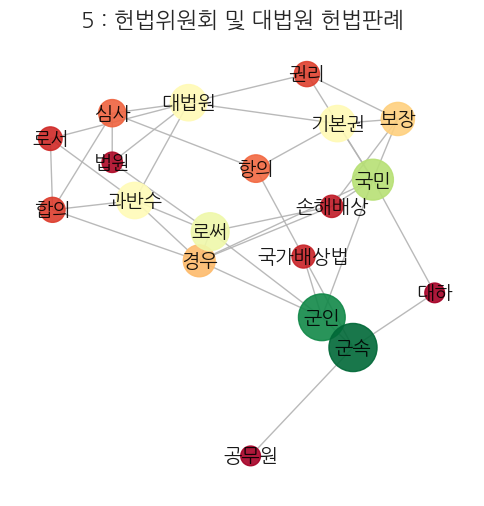

In [ ]:
# 네트워크 시각화 (02)

pr = nx.pagerank(newG).values()

spl = nx.spring_layout(newG)

newG.remove_edges_from(nx.selfloop_edges(newG))    # Removing self-loops from undirected networkx graph

plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'NanumGothic'


option = {
    'font_size' : 14,
    'font_family' : font_name,
    'node_color' : list(pr),
    'edge_color' : '#B2B2B2',
    'node_size' : get_node_size(pr),
    'alpha' : 0.9,
    'cmap' : plt.cm.RdYlGn
}

plt.figure(figsize=(6,6)) #사이즈 조정

plt.title('5 : 헌법위원회 및 대법원 헌법판례', fontsize=16)
nx.draw_networkx(newG, pos=spl, **option)

plt.axis('off')       # 외곽선 그리지 않기
#plt.savefig('spring_layout.png')     # 그림 저장하기

plt.show()


In [ ]:
# Shell Layout으로 시각화 하기


page = nx.pagerank(newG)

sorted_page = sorted(page.items(), key=operator.itemgetter(1), reverse=True)

word_only = [x[0] for x in sorted_page]       # 리스트 안에 있는 각 튜플의 첫번째 요소만 추출 - ('사회', 0.03717191137555868)  에서 '사회' 만 추출
print(word_only)
print()

inner = [x[0] for x in sorted_page[:10]] #가운데에 들어갈 10개만 뽑음
print(inner)
print()

outer = [x[0] for x in sorted_page[10:]]
print(outer)


['군속', '군인', '국민', '로써', '과반수', '기본권', '대법원', '보장', '경우', '항의', '심사', '권리', '합의', '로서', '국가배상법', '손해배상', '법원', '대하', '공무원']

['군속', '군인', '국민', '로써', '과반수', '기본권', '대법원', '보장', '경우', '항의']

['심사', '권리', '합의', '로서', '국가배상법', '손해배상', '법원', '대하', '공무원']


In [ ]:
# Shell graph 를 위한 내부 단어 및 외부 단어를 설정

two_mode = [inner] + [outer]

print(two_mode)


[['군속', '군인', '국민', '로써', '과반수', '기본권', '대법원', '보장', '경우', '항의'], ['심사', '권리', '합의', '로서', '국가배상법', '손해배상', '법원', '대하', '공무원']]


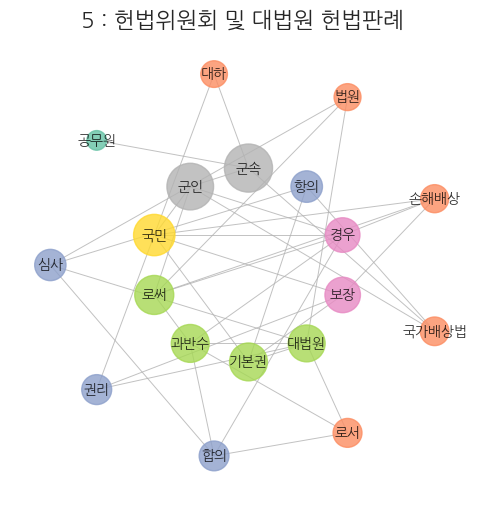

In [ ]:
pr = nx.pagerank(newG).values()

shell = nx.shell_layout(newG, two_mode)

plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'NanumGothic'

option = {
    'font_size' : 10,
    'font_family' : font_name,
    'node_color' : list(pr),
    'edge_color' : '#B2B2B2',
    'node_size' : get_node_size(pr),
    'width' : 0.7,                      # Line width of edges  (default=1.0)
    'alpha' : 0.8,
    'cmap' : plt.cm.Set2
}

plt.figure(figsize=(6,6))

plt.title('5 : 헌법위원회 및 대법원 헌법판례', fontsize=16)
nx.draw_networkx(newG, pos=shell, **option)

plt.axis('off')       # 외곽선 그리지 않기
#plt.savefig('shell_layout.png')     # 그림 저장하기

plt.show()